# Στοχαστικές Διεργασίες και Βελτιστοποίηση στη Μηχανική Μάθηση

## 1ο Εργαστήριο - Polynomial Regression

- Ονομ/νυμο: Χρήστος Νίκου
- AM: 03400146
- Ιδιότητα: Μεταπτυχιακός φοιτητής Επιστήμης Δεδομένων και Μηχανικής Μάθησης (ΕΔΕΜΜ)
- Ηλεκτρονική Διεύθυνση: christosnikou@mail.ntua.gr / chrisnick92@gmail.com

<h1><b>Ο αλγόριθμος Πολυωνυμικής Παλινδρόμησης (Polynomial Regression)</b></h1>

# Εκφώνηση

<p align="justify">Στην άσκηση αυτή θα μελετήσετε τον αλγόριθμο <b><i>πολυωνυμικής παλινδρόμησης</i></b> (<b><i>polynomial regression</i></b>). Για την εκπαίδευση του μοντέλου θα χρησιμοποιήσετε τα δεδομένα του αρχείου <b><i><a href="https://github.com/nkostopoulos/StochasticsLabPublic/blob/master/lab1/data2.csv">data2.csv</a></b></i>. Η εφαρμογή αφορά την εκτίμηση των τιμών της πίεσης (pressure) ενός συστήματος δεδομένης της θερμοκρασίας (temperature).</p>

<p align="justify">Στο Notebook αυτό περιλαμβάνονται εντολές για (α) τη φόρτωση των δεδομένων εκπαίδευσης που περιέχονται στο αρχείο <b><i>data2.csv</b></i>, (β) την εκπαίδευση ενός μοντέλου <b><i>linear regression</i></b> και την προσαρμογή του πάνω στα δεδομένα εκπαίδευσης, (γ) την εκπαίδευση ενός μοντέλου <b><i>polynomial regression</i></b> βαθμού <b><i>degree</i></b> και την προσαρμογή του πάνω στα δεδομένα εκπαίδευσης και (δ) την οπτικοποίηση των δεδομένων εκπαίδευσης, καθώς και των γραμμών απόφασης για τα δύο μοντέλα παλινδρόμησης. Για την εκπαίδευση των δύο μοντέλων παλινδρόμησης χρησιμοποιείται η βιβλιοθήκη <b><i>Scikit-Learn</b></i> της <b><i>Python</i></b>. Περισσότερες πληροφορίες για τον αλγόριθμο <b><i>polynomial regression</i></b> και τον κώδικα της άσκησης μπορούν να βρεθούν <a href="https://www.geeksforgeeks.org/python-implementation-of-polynomial-regression/">εδώ</a>.</p>

<p align="justify">Στην άσκηση αυτή, καλείστε να παρατηρήσετε τη μορφή και τις αλλαγές της γραμμής παλινδρόμησης για διαφορετικές τιμές της παραμέτρου <b><i>degree</b></i> βάσει των δεδομένων εκπαίδευσης που παρέχονται.</p>

<p align="justify">Αρχικά, θα εγκαταστήσετε και θα φορτώσετε τις απαραίτητες βιβλιοθήκες.</p>


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # For better visualizations
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

Στη συνέχεια, θα φορτώσετε τα δεδομένα εκπαίδευσης που παρέχονται από το αρχείο
 <b><i>data2.csv</b></i>.

In [9]:
url = "https://raw.githubusercontent.com/ChrisNick92/StochasticsLabPublic/master/lab1/data2.csv"
datas = pd.read_csv(url)
datas

,sno,Temperature,Pressure
0,1,0,0.0002
1,2,5,0.0010
2,3,10,0.0017
3,4,15,0.0040
4,5,20,0.0200
5,6,25,0.0400
6,7,30,0.0100
7,8,35,0.0340
8,9,40,0.0500
9,10,45,0.0600


Τώρα, θα δημιουργήσετε τις μεταβλητές εισόδου και εξόδου για τους αλγορίθμους μηχανικής μάθησης από τα δεδομένα εκπαίδευσης που παρέχονται.

In [10]:
X = datas.iloc[:, 1:2].values
y = datas.iloc[:, 2].values

print("Input")

print(X)

print("Labels")

print(y)

Input
[[ 0]
 [ 5]
 [10]
 [15]
 [20]
 [25]
 [30]
 [35]
 [40]
 [45]
 [50]
 [55]
 [60]
 [65]
 [70]]
Labels
[0.0002 0.001  0.0017 0.004  0.02   0.04   0.01   0.034  0.05   0.06
 0.07   0.08   0.09   0.1    0.11  ]


Στη συνέχεια, θα εκπαιδεύσετε το μοντέλο <b><i>linear regression</i></b>, χρησιμοποιώντας τα παραπάνω δεδομένα εκπαίδευσης.

In [11]:
lin = LinearRegression()
lin.fit(X, y)

LinearRegression()

<h3><b><i>Ερώτημα 1</b></i></h3>

<p align="justify">Να εκτελέσετε τα παρακάτω τμήματα κώδικα για τις τιμές της παραμέτρου <b><i>degree</b></i> {<i>2, 3, 4, 5, 8, 10, 12, 15</i>} και να καταγράψετε τα διαγράμματα που παρέχονται ως έξοδοι. Τι αλλαγές παρατηρείτε στη μορφή της γραμμής παλινδρόμησης για το μοντέλο <b><i>polynomial regression</i></b>, καθώς αυξάνεται η τιμή της παραμέτρου <b><i>degree</i></b>; Τι παρατηρείτε για τον απαιτούμενο χρόνο εκπαίδευσης του μοντέλου <b><i>polynomial regression</i></b>, καθώς αυξάνεται η τιμή της παραμέτρου <b><i>degree</i></b>;</p>

<br>

<h3><b><i>Απάντηση</b></i></h3>

Όπως παρατηρούμε από τα σχήματα που ακολουθούν παρακάτω όσο αυξάνεται ο βαθμός του πολυωνύμου τόσο η καμπύλη παλινδρόμησης τείνει να περάσει απ' όλα τα δεδομένα εκπαίδευσης. Με άλλα λόγια, όσο αυξάνεται ο αριθμός του βαθμού του πολυωνύμου το μοντέλο μαθαίνει όλο και περισσότερο το σύνολο των δεδομένων. Φυσικά, η συνεχής αύξηση του βαθμού του πολυωνύμου οδηγεί στο φαινόμενο της υπερκαίδευσης (*overfitting*). Αυτό έχει ως αποτέλεσμα το μοντέλο να μαθαίνει πολύ καλά το σύνολο των δεδομένων χωρίς όμως να έχει καλή δυνατότητα γενίκευσης σε νέα άγνωστα δεδομένα. Στο συγκεκριμένο παράδειγμα βλέπουμε ότι απ' τον 8ο βαθμό και πάνω το μοντέλο της πολυωνυμικής παλινδρόμησης πέφτει σε *overfitting*. Τέλος, ένα άλλο μειονέκτημα που έχει η αυθαίρετη αύξηση του βαθμού του πολυωνύμου τόσο αυξάνεται και ο χρόνος εκπαίδευσης του μοντέλου.

**<h4> <b><i>degree</b></i> = 2 </h4>**

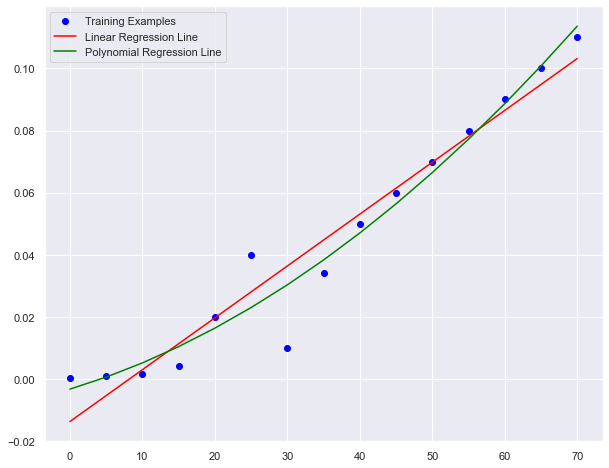

In [14]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
poly.fit(X_poly, y)
lin2 = LinearRegression()
lin2.fit(X_poly, y)

sns.set_theme()

fig, ax = plt.subplots(figsize = (10,8))
ax.scatter(X, y, color = 'blue', label = 'Training Examples')

ax.plot(X, lin.predict(X), color = 'red', label = 'Linear Regression Line')
ax.plot(X, lin2.predict(poly.fit_transform(X)), color = 'green', label = 'Polynomial Regression Line')
ax.legend()
plt.show()

<h4> <b><i>degree</b></i> = 3 </h4>

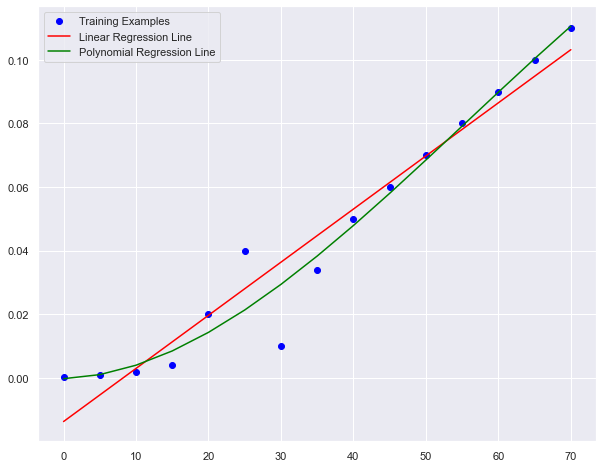

In [15]:
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)
poly.fit(X_poly, y)
lin2 = LinearRegression()
lin2.fit(X_poly, y)

sns.set_theme()

fig, ax = plt.subplots(figsize = (10,8))
ax.scatter(X, y, color = 'blue', label = 'Training Examples')

ax.plot(X, lin.predict(X), color = 'red', label = 'Linear Regression Line')
ax.plot(X, lin2.predict(poly.fit_transform(X)), color = 'green', label = 'Polynomial Regression Line')
ax.legend()
plt.show()

<h4> <b><i>degree</b></i> = 4 </h4>

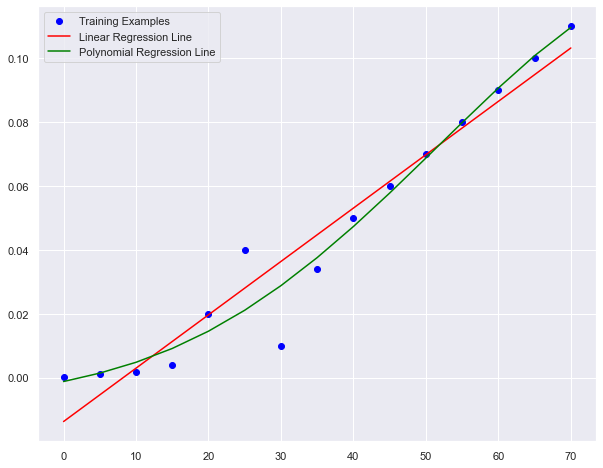

In [16]:
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)
poly.fit(X_poly, y)
lin2 = LinearRegression()
lin2.fit(X_poly, y)

sns.set_theme()

fig, ax = plt.subplots(figsize = (10,8))
ax.scatter(X, y, color = 'blue', label = 'Training Examples')

ax.plot(X, lin.predict(X), color = 'red', label = 'Linear Regression Line')
ax.plot(X, lin2.predict(poly.fit_transform(X)), color = 'green', label = 'Polynomial Regression Line')
ax.legend()
plt.show()

<h4> <b><i>degree</b></i> = 5 </h4>

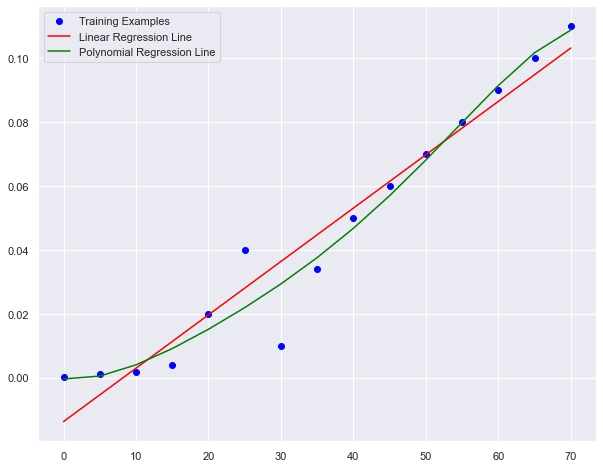

In [17]:
poly = PolynomialFeatures(degree=5)
X_poly = poly.fit_transform(X)
poly.fit(X_poly, y)
lin2 = LinearRegression()
lin2.fit(X_poly, y)

sns.set_theme()

fig, ax = plt.subplots(figsize = (10,8))

ax.scatter(X, y, color = 'blue', label = 'Training Examples')

ax.plot(X, lin.predict(X), color = 'red', label = 'Linear Regression Line')
ax.plot(X, lin2.predict(poly.fit_transform(X)), color = 'green', label = 'Polynomial Regression Line')
ax.legend()
plt.show()

<h4> <b><i>degree</b></i> = 8 </h4>

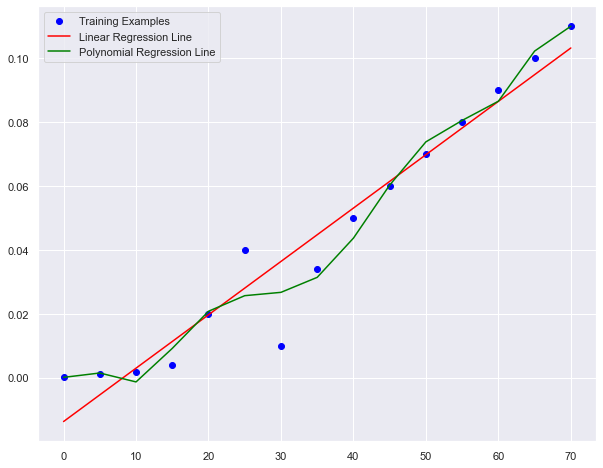

In [18]:
poly = PolynomialFeatures(degree=8)
X_poly = poly.fit_transform(X)
poly.fit(X_poly, y)
lin2 = LinearRegression()
lin2.fit(X_poly, y)

sns.set_theme()

fig, ax = plt.subplots(figsize = (10,8))

ax.scatter(X, y, color = 'blue', label = 'Training Examples')

ax.plot(X, lin.predict(X), color = 'red', label = 'Linear Regression Line')
ax.plot(X, lin2.predict(poly.fit_transform(X)), color = 'green', label = 'Polynomial Regression Line')
ax.legend()
plt.show()

<h4> <b><i>degree</b></i> = 10 </h4>

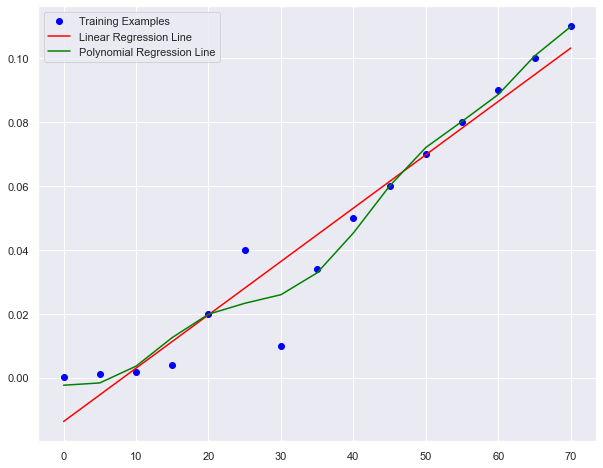

In [19]:
poly = PolynomialFeatures(degree=10)
X_poly = poly.fit_transform(X)
poly.fit(X_poly, y)
lin2 = LinearRegression()
lin2.fit(X_poly, y)

sns.set_theme()

fig, ax = plt.subplots(figsize = (10,8))

ax.scatter(X, y, color = 'blue', label = 'Training Examples')

ax.plot(X, lin.predict(X), color = 'red', label = 'Linear Regression Line')
ax.plot(X, lin2.predict(poly.fit_transform(X)), color = 'green', label = 'Polynomial Regression Line')
ax.legend()
plt.show()

<h4> <b><i>degree</b></i> = 12 </h4>

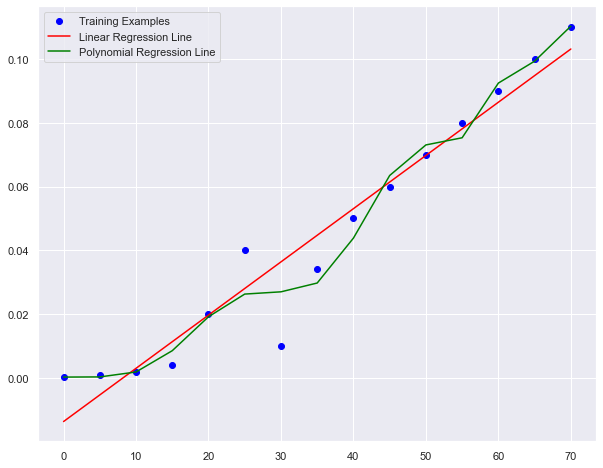

In [20]:
poly = PolynomialFeatures(degree=12)
X_poly = poly.fit_transform(X)
poly.fit(X_poly, y)
lin2 = LinearRegression()
lin2.fit(X_poly, y)

sns.set_theme()

fig, ax = plt.subplots(figsize = (10,8))

ax.scatter(X, y, color = 'blue', label = 'Training Examples')

ax.plot(X, lin.predict(X), color = 'red', label = 'Linear Regression Line')
ax.plot(X, lin2.predict(poly.fit_transform(X)), color = 'green', label = 'Polynomial Regression Line')
ax.legend()
plt.show()

<h4> <b><i>degree</b></i> = 15 </h4>

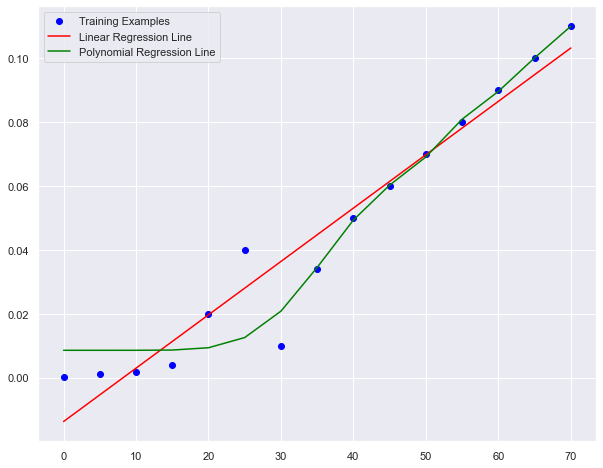

In [21]:
poly = PolynomialFeatures(degree=15)
X_poly = poly.fit_transform(X)
poly.fit(X_poly, y)
lin2 = LinearRegression()
lin2.fit(X_poly, y)

sns.set_theme()

fig, ax = plt.subplots(figsize = (10,8))

ax.scatter(X, y, color = 'blue', label = 'Training Examples')

ax.plot(X, lin.predict(X), color = 'red', label = 'Linear Regression Line')
ax.plot(X, lin2.predict(poly.fit_transform(X)), color = 'green', label = 'Polynomial Regression Line')
ax.legend()
plt.show()

<h3><b><i>Ερώτημα 2</b></i></h3>

Σας παρέχεται, επίσης, το αρχείο <b><i>data2b.csv</i></b>, το οποίο είναι το αρχείο <b><i>data2.csv</i></b> με μία παραπάνω εγγραφή, την <b><i>(9, 38, 0.3)</i></b>. Να εκτελέσετε το παρακάτω πρόγραμμα για την τιμή της παραμέτρου <b><i>degree = 15</i></b>. Πόσο μεγάλη είναι η αλλαγή που παρατηρείτε στη μορφή της γραμμής παλινδρόμησης σε σχέση με την αντίστοιχη περίπτωση του ερωτήματος 1; Τι συμπέρασμα μπορείτε να βγάλετε για τον αλγόριθμο <b><i>polynomial regression</i></b>;

    sno  Temperature  Pressure
0     1            0    0.0002
1     2            5    0.0010
2     3           10    0.0017
3     4           15    0.0040
4     5           20    0.0200
5     6           25    0.0400
6     7           30    0.0100
7     8           35    0.0340
8     9           38    0.3000
9    10           40    0.0500
10   11           45    0.0600
11   12           50    0.0700
12   13           55    0.0800
13   14           60    0.0900
14   15           65    0.1000
15   16           70    0.1100


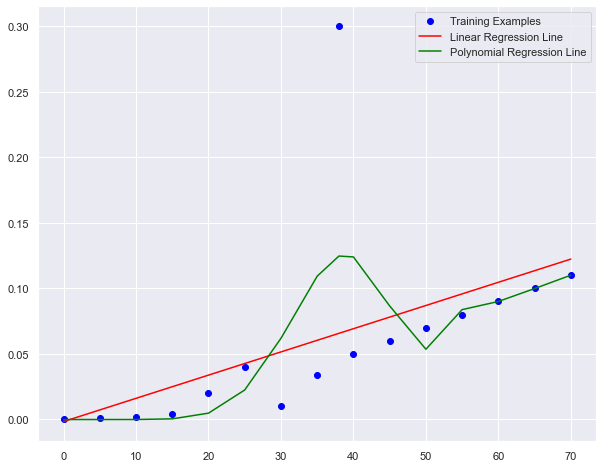

In [22]:
url2 = "https://raw.githubusercontent.com/ChrisNick92/StochasticsLabPublic/master/lab1/data2b.csv"
datas = pd.read_csv(url2)
print(datas)

X = datas.iloc[:, 1:2].values
y = datas.iloc[:, 2].values

lin = LinearRegression()
lin.fit(X, y)

poly = PolynomialFeatures(degree=15)
X_poly = poly.fit_transform(X)
poly.fit(X_poly, y)
lin2 = LinearRegression()
lin2.fit(X_poly, y)

sns.set_theme()

fig, ax = plt.subplots(figsize = (10,8))

ax.scatter(X, y, color = 'blue', label = 'Training Examples')

ax.plot(X, lin.predict(X), color = 'red', label = 'Linear Regression Line')
ax.plot(X, lin2.predict(poly.fit_transform(X)), color = 'green', label = 'Polynomial Regression Line')
ax.legend()
plt.show()

<h3><b><i>Απάντηση</b></i></h3>

Όπως βλέπουμε η καμπύλη που προκύπτει για το πολυώνυμο 15ου βαθμού έχοντας προσθέσει το σημείο $(38,0.30)$ στο σύνολο δεδομένων είναι τελειώς διαφορετική απ' το πολυώνυμο 15ου βαθμού χωρίς να συμπεριλάβουμε το εν λόγω σημείο. Αυτό συμβαίνει διότι η καμπύλη του πολυωνύμου, λόγο του μεγάλου βαθμού, προσπαθεί να περάσει απ' το σημείο $(38, 0.30)$ το οποίο βρίσκεται πολύ μακριά απ' το υπόλοιπο σύνολο δεδομένων (αποτελεί *outlier*). Το συμπέρασμα που μπορούμε να βγάλουμε για την πολυωνυμική παλινδρόμηση (*Polynomial regression*) είναι ότι πρέπει να προσέχουμε στην επιλογή βαθμού του πολυωνύμου που θα διαλέξουμε για να περιγράψουμε το πρόβλημά μας. Δηλαδή, θα πρέπει να βρούμε έναν βαθμό ο οποίος να πετυχαίνει όσον το δυνατό καλύτερη γενίκευση χωρίς όμως να υπεραναλύει τα δεδομένα εκπαίδευσης (*overfitting*).